**HEATMAP FOR FEATURE EXPLORATION**

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

DATA LOADING

In [92]:
# Read the CSV
sncb_df = pd.read_csv("sncb_data_challenge.csv", sep='\;', engine='python', index_col=0)

# Convert the arrays columns to NumPy arrays (for str arrays)
for column in ["vehicles_sequence", "events_sequence"]:
  sncb_df[column] = sncb_df[column].apply(lambda x: np.array(x.strip("[]").split(", "), dtype=str))

# Convert the arrays columns to NumPy arrays (for float arrays)
for column in ["seconds_to_incident_sequence", "train_kph_sequence"]:
  sncb_df[column] = sncb_df[column].apply(lambda x: np.array(x.strip("[]").split(", "), dtype=float))

# Convert the arrays columns to NumPy arrays (for bool arrays)
for column in ["dj_ac_state_sequence", "dj_dc_state_sequence"]:
  sncb_df[column] = sncb_df[column].apply(lambda x: (np.array(x.strip("[]").split(", "), dtype=object) == "True"))

# Check the data
sncb_df.head()

,incident_id,vehicles_sequence,events_sequence,seconds_to_incident_sequence,approx_lat,approx_lon,train_kph_sequence,dj_ac_state_sequence,dj_dc_state_sequence,incident_type
0,4432881,"[609, 609, 609, 609, 609, 609, 609, 609, 609, ...","[2744, 4004, 2852, 4110, 2854, 4396, 1132, 414...","[-5510.0, -5510.0, -5507.0, -5507.0, -5506.0, ...",50.876601,4.718143,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",4
1,4432943,"[526, 526, 526, 526, 526, 526, 526, 526, 526, ...","[2744, 4148, 4394, 1566, 1570, 4396, 3634, 412...","[-8573.0, -8573.0, -8032.0, -8032.0, -8032.0, ...",51.037435,4.431218,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.1,...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",13
2,4432955,"[592, 592, 592, 592, 592, 592, 592, 592, 592, ...","[4394, 1566, 1570, 4114, 4168, 4168, 4156, 406...","[-12291.0, -12291.0, -12291.0, -10932.0, -1093...",50.864083,4.162115,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, False, True, Tr...",14
3,4433021,"[576, 576, 576, 576, 576, 576, 576, 576, 576, ...","[4066, 4066, 4066, 4066, 4068, 2742, 4026, 270...","[-14351.0, -14204.0, -13890.0, -13383.0, -1273...",51.183220,4.276025,"[0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",2
4,4433129,"[634, 634, 634, 634, 634, 634, 634, 634, 634, ...","[4002, 4032, 4028, 2852, 4026, 4110, 2742, 285...","[-224.0, -224.0, -223.0, -222.0, -222.0, -222....",50.818727,3.253601,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",14


In [93]:
# Calculate the counts for each incident type
incident_counts = sncb_df['incident_type'].value_counts()

In [94]:
# MOST COMMON EVENT ACROSS ALL EVENTS FROM ALL INCIDENTS
data = np.array([])
for row in sncb_df['events_sequence']:
  data = np.concatenate((data, row))

typeAll_events_count = pd.DataFrame(pd.DataFrame(data, columns=['event_type']).value_counts().sort_values(ascending=False), columns=['count'])
typeAll_events_count.reset_index(inplace=True)
typeAll_events_count['event_freq'] = typeAll_events_count['event_type'].apply(lambda x: sncb_df['events_sequence'].apply(lambda y: x in y).sum()/len(sncb_df))

In [95]:
typeAll_events_count.sort_values(by=["count"], axis = 0, ascending = False)

,event_type,count,event_freq
0,2956,291975,0.851632
1,3658,26608,0.880317
2,3636,26491,0.876360
3,4066,23018,0.941642
4,4068,22951,0.934718
...,...,...,...
864,4212,1,0.000989
865,2928,1,0.000989
914,950,1,0.000989
915,1040,1,0.000989


In [96]:
feature_importance_df = pd.read_csv("gb_importance.csv", sep='\,', engine='python', dtype={'feature': 'string'})

feature_importance_df

,importance,feature
0,0.043043,4080
1,0.027375,3548
2,0.022573,3528
3,0.022431,942
4,0.021125,2492
...,...,...
821,0.000000,920
822,0.000000,906
823,0.000000,66
824,0.000000,678


In [97]:
pd.merge(typeAll_events_count, feature_importance_df,  left_on='event_type', right_on='feature', how='left')

merged_df.replace(np.nan, 0, inplace=True)
merged_df.sort_values('importance', ascending=False, inplace=True)

merged_df

,importance,feature,event_type,count,event_freq
712,0.043043,4080,4080,652,0.298714
590,0.027375,3548,3548,306,0.086053
583,0.022573,3528,3528,174,0.077151
900,0.022431,942,942,217,0.081108
303,0.021125,2492,2492,495,0.223541
...,...,...,...,...,...
128,0.000000,0,1664,1,0.000989
133,0.000000,0,1678,1,0.000989
143,0.000000,0,1704,1,0.000989
206,0.000000,0,1876,1,0.000989


In [98]:
import numpy as np

def reorder_and_apply(arr, other_array):
    """
    Reorders the elements of `arr` in ascending order and applies the same reordering
    to other arrays.
    """
    arr = np.array(arr)
    #other_arrays = [np.array(other) for other in other_arrays]
    other_array = np.array(other_array)

    order = np.argsort(arr)
    reordered_arr = arr[order]
    reordered_other_array  = other_array [order]
    #reordered_others = [other[order] for other in other_arrays]

    return reordered_arr, other_array

reordered_sncb_df = pd.DataFrame()
# Apply reordering to each row using a lambda function
reordered_sncb_df[['seconds_to_incident_sequence', 'events_sequence']] = sncb_df.apply(
    lambda row: pd.Series(reorder_and_apply(row['seconds_to_incident_sequence'], row['events_sequence'])),
    axis=1
)

reordered_sncb_df = pd.concat([sncb_df[['incident_id', 'incident_type']], reordered_sncb_df], axis=1)

reordered_sncb_df

,incident_id,incident_type,seconds_to_incident_sequence,events_sequence
0,4432881,4,"[-5510.0, -5510.0, -5507.0, -5507.0, -5506.0, ...","[2744, 4004, 2852, 4110, 2854, 4396, 1132, 414..."
1,4432943,13,"[-8573.0, -8573.0, -8572.0, -8032.0, -8032.0, ...","[2744, 4148, 4394, 1566, 1570, 4396, 3634, 412..."
2,4432955,14,"[-12291.0, -12291.0, -12291.0, -12291.0, -1229...","[4394, 1566, 1570, 4114, 4168, 4168, 4156, 406..."
3,4433021,2,"[-14353.0, -14351.0, -14340.0, -14340.0, -1433...","[4066, 4066, 4066, 4066, 4068, 2742, 4026, 270..."
4,4433129,14,"[-227.0, -227.0, -226.0, -225.0, -225.0, -225....","[4002, 4032, 4028, 2852, 4026, 4110, 2742, 285..."
...,...,...,...,...
1006,4611953,14,"[-13963.0, -13961.0, -13961.0, -13959.0, -1395...","[4002, 2852, 4110, 2854, 4026, 4092, 4094, 261..."
1007,4611991,2,"[-14384.0, -14360.0, -14348.0, -14347.0, -1433...","[3490, 4068, 4068, 4068, 4068, 4068, 4068, 406..."
1008,4612137,2,"[-14307.0, -14303.0, -14277.0, -14275.0, -1426...","[4066, 4066, 4066, 4068, 3658, 4066, 3658, 406..."
1009,4612321,13,"[-14400.0, -14337.0, -14335.0, -14307.0, -1429...","[2956, 2956, 2956, 2956, 2956, 2956, 2956, 295..."


In [99]:
# Create the value_map dictionary
value_map = merged_df.set_index('event_type')['importance'].to_dict()

In [100]:
heat_id = 44233933

heat_incident = reordered_sncb_df[reordered_sncb_df['incident_id'] == heat_id]

# Apply mapping to each element in the sequence and ensure output is float-compatible
def map_event_sequence(sequence, value_map):
    if isinstance(sequence, (list, np.ndarray)):  # Check if it's a list or array
        return [float(value_map.get(event, float('nan'))) for event in sequence]
    else:
        return float(value_map.get(sequence, float('nan')))  # Handle scalar values

# Apply the mapping function and convert to a NumPy array of floats
heat_incident['heat_values'] = heat_incident['events_sequence'].apply(
    lambda x: map_event_sequence(x, value_map)
)

/var/folders/ms/qjbp9wgx6vx3nn1vknkn185r0000gn/T/ipykernel_47195/2510890358.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_incident['heat_values'] = heat_incident['events_sequence'].apply(


In [101]:
texts = np.concatenate(heat_incident['events_sequence'].values).astype(str)
values = np.concatenate(heat_incident['heat_values'].values).astype(float)

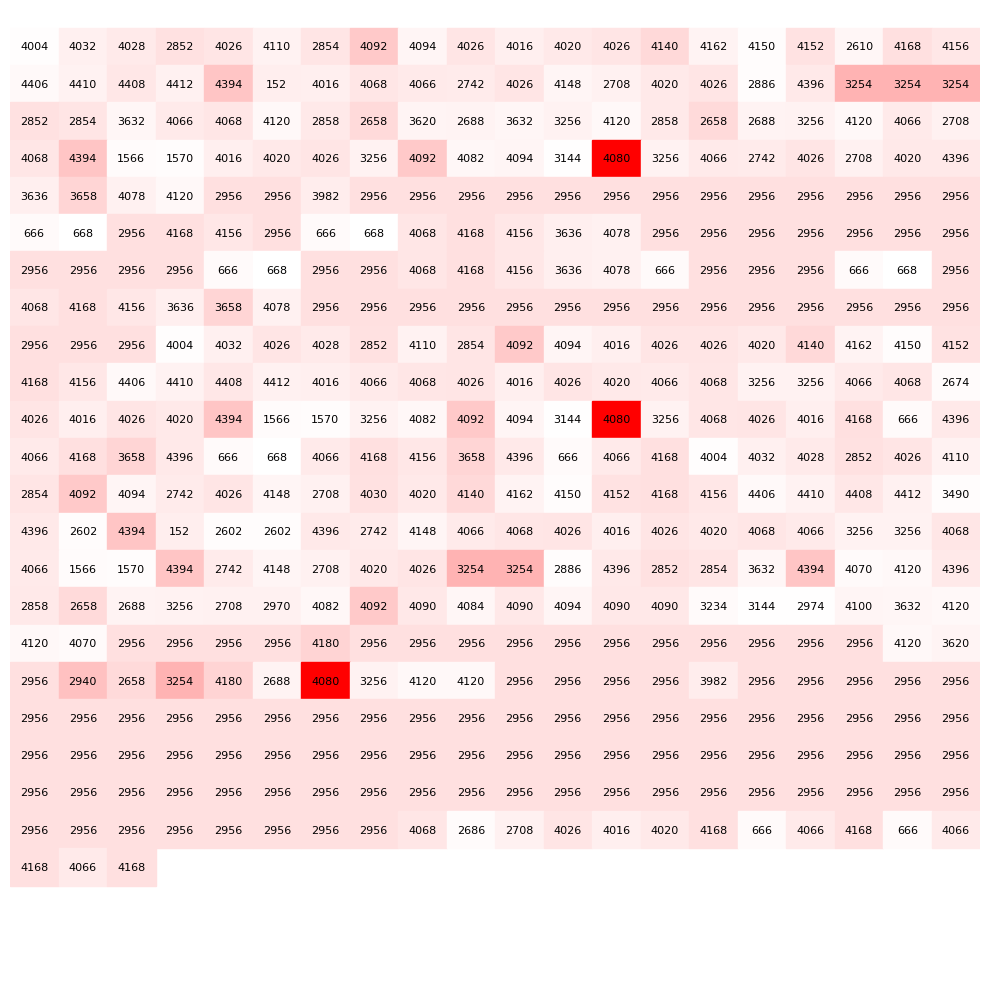

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Create a figure
fig, ax = plt.subplots(figsize=(10, 10))

white_to_red = mcolors.LinearSegmentedColormap.from_list('white_to_red', ['white', 'red'])

# Normalize values to range [0, 1]
norm = mcolors.Normalize(vmin=min(values), vmax=max(values))

# Loop through text and values
for i, (text, value) in enumerate(zip(texts, values)):
    row = i // 20  # Define row number (20 texts per row)
    col = i % 20   # Define column number
    red_intensity = white_to_red(norm(value))
    
    # Plot text with background
    ax.add_patch(plt.Rectangle((col - 0.5, -row - 0.5), 1, 1, color=red_intensity))  # Add colored rectangle
    ax.text(col, -row, text, fontsize=8, ha='center', va='center')

# Adjust plot aesthetics
ax.set_xlim(-0.5, 20 - 0.5)
ax.set_ylim(-25, 1)  # Adjust height for 1000 values (20 per row)
ax.axis('off')  # Turn off axes

# Show the plot
plt.tight_layout()
plt.show()

#fig.savefig(f"Heatmap for Incident - {heat_id}.png")